
# Introducción y descripción
El análisis del abandono de clientes en el sector bancario es fundamental para identificar patrones que permitan mejorar las estrategias de retención y, por ende, aumentar la rentabilidad. Este análisis está dirigido a ejecutivos de alto nivel que buscan comprender qué factores influyen en la decisión de un cliente de abandonar el banco.

https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction?resource=download



# Preguntas e Hipótesis de interés

Para guiar este análisis, se han formulado las siguientes peguntas:

1. ¿Qué factores influyen más en la decisión de un cliente de abandonar el banco?
2. ¿Existen diferencias significativas en la tasa de abandono entre diferentes países o géneros?
3. ¿La puntuación crediticia, la edad o la duración de la relación con el banco son predictores importantes del abandono?
4. ¿El hecho de tener una tarjeta de crédito o ser un miembro activo reduce la probabilidad de abandono?


In [1]:
#Importacion de datos y vista previa

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Wizardiem/Comision-61145-Data-Science-II/main/Churn_Modelling.csv')

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [2]:
# Cuales son las dimensiones del dataset
df.shape

(10002, 14)

In [3]:
# Buscamos tener informacion sobre el dataset y cada una de sus columnas y que tipo de datos la componen.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


#Descripcion de Columnas

  Con el .info() podemos descubrir que contamos con 14 columnas de 10.002 filas y con el formato correspondiente, siendo la mayoria de ellos en Int64 o Float64, menos en los casos de Geography, Gender y Surname que son Objetct.

  A continuacion una breve descripcion de que significa cada columna para el mejor entendimiento del set de datos.

0.   RowNumber        Indice
1.   CustomerId       Un identificador único para cada cliente
2.   Surname          El apellido o apellido del cliente.
3.   CreditScore      Un valor numérico que representa la puntuación crediticia del cliente
4.   Geography        El país donde reside el cliente (Francia, España o Alemania)
5.   Gender           El género del cliente (masculino o femenino)
6.   Age              La edad del cliente
7.   Tenure           el número de años que el cliente ha estado en el banco.
8.   Balance          El saldo de la cuenta del cliente.
9.   NumOfProducts    La cantidad de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorros, tarjeta de crédito)
10.  HasCrCard        Si el cliente tiene una tarjeta de crédito (1 = sí, 0 = no)
11.  IsActiveMember   Si el cliente es un miembro activo (1 = sí, 0 = no)
12.  EstimatedSalary  El salario estimado del cliente
13.  Exited           Si el cliente se ha dado de baja (1 = sí, 0 = no)

Por otro lado, ya podemos notar que en los siguientes atributos tenemos campos nulos.

Geography        
Age           
HasCrCard        
IsActiveMember

In [4]:
#Vamos a contar cuantos datos null tenemos en cada columna.
df.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
# Realizamos la descripción estadística del dataset
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.00,10002.00,10002.00,10001.00,10002.00,10002.00,10002.00,10001.00,10001.00,10002.00,10002.0
mean,5001.50,15690933.45,650.56,38.92,5.01,76491.11,1.53,0.71,0.51,100083.33,0.2
std,2887.47,71931.77,96.66,10.49,2.89,62393.47,0.58,0.46,0.50,57508.12,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2501.25,15628524.75,584.00,32.00,3.00,0.00,1.00,0.00,0.00,50983.75,0.0
50%,5001.50,15690732.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100185.24,0.0
75%,7501.75,15753225.50,718.00,44.00,7.00,127647.84,2.00,1.00,1.00,149383.65,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


# Limpieza y transformacion de datos

Segun la descripcion de columnas y los datos descriptos podemos tomar la decision de eliminar las columnas de RowNumber y CustomerId ya que para el analisis estadistico no estan aportando informacion.

In [6]:
# Eliminacion de las columnas mencionadas
df = df.drop(['RowNumber', 'CustomerId'], axis=1)
# Comprobamos el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10002 non-null  object 
 1   CreditScore      10002 non-null  int64  
 2   Geography        10001 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10001 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10001 non-null  float64
 9   IsActiveMember   10001 non-null  float64
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 937.8+ KB


# Valores null  - Estrategias utilizadas


In [7]:
# Limpieza y Transformación de Datos

# Manejar valores nulos
 # En este caso, reemplazar con la mediana
df['HasCrCard'].fillna(df['HasCrCard'].median(), inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].median(), inplace=True)

 # Para el caso de la edad utilizo la moda.
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

# Revisamos los datos después de la transformación
df.describe().round(2)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.00,10002.00,10002.00,10002.00,10002.00,10002.00,10002.00,10002.00,10002.0
mean,650.56,38.92,5.01,76491.11,1.53,0.71,0.51,100083.33,0.2
std,96.66,10.49,2.89,62393.47,0.58,0.46,0.50,57508.12,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,50983.75,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100185.24,0.0
75%,718.00,44.00,7.00,127647.84,2.00,1.00,1.00,149383.65,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [8]:
# Revisamos las columnas con la codificacion de variables categoricas
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [9]:
# Los siguientes atributos los pasamos a INT ya que solo permite 1 y 0

df['IsActiveMember'] = df['IsActiveMember'].astype('int')
df['HasCrCard'] = df['HasCrCard'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10002 non-null  object 
 1   CreditScore      10002 non-null  int64  
 2   Geography        10001 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10002 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10002 non-null  int64  
 9   IsActiveMember   10002 non-null  int64  
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 937.8+ KB


#Análisis Exploratorio de Datos (EDA)
El análisis univariado consiste en explorar cada variable de manera individual para entender su distribución y características.


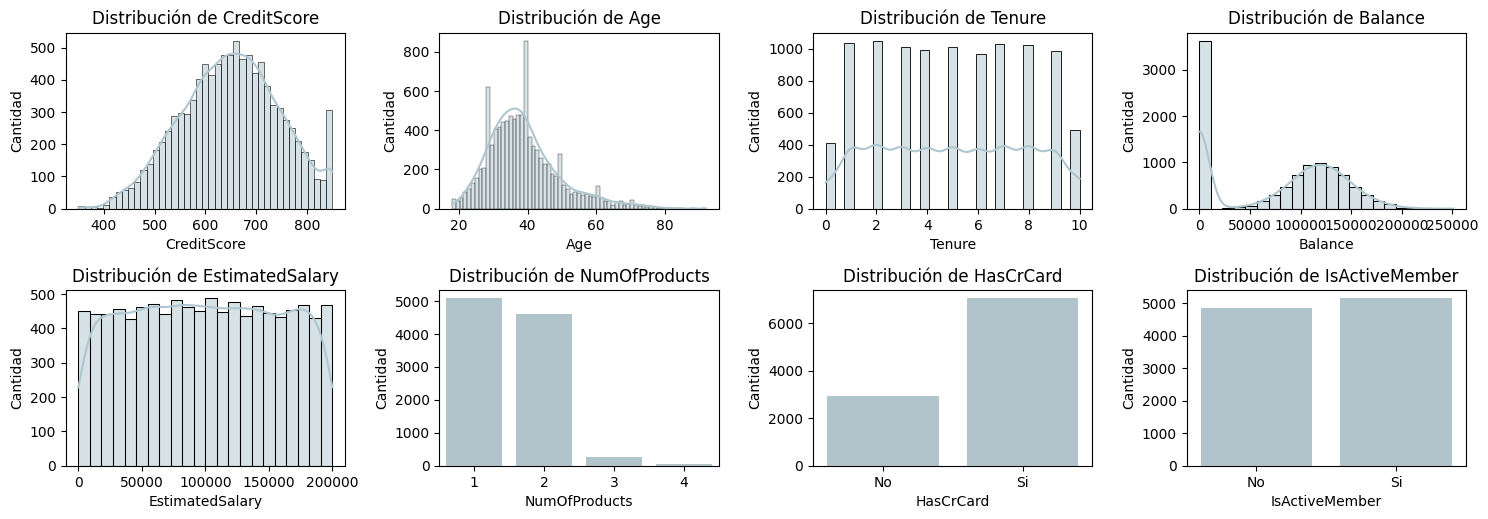

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas continuas
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
# Variables discretas
discrete_vars = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))

# Graficar las variables numéricas continuas
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[var], kde=True, color='#AEC6CF')
    plt.ylabel('Cantidad')
    plt.title(f'Distribución de {var}')

# Graficar las variables discretas
for i, var in enumerate(discrete_vars, len(continuous_vars)):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=var, data=df, color='#AEC6CF')
    plt.title(f'Distribución de {var}')
    plt.ylabel('Cantidad')
    if var in ['HasCrCard', 'IsActiveMember']:
        plt.xticks([0, 1], labels=['No', 'Si'])

plt.tight_layout()
plt.show()


#Conclusiones

Variables numericas

Luego de realizar un analisis univariado por cada atributo podemos determinar las siguientes conclusiones:

- CreditScore Un valor numérico que representa la puntuación crediticia del cliente - Tiene una distribucion asimetrica hacia la derecha, de todas maneras contine valores muy altos que pueden ser determinados outliers.
- Age La edad del cliente: Contamos con una distribucion asimetrica hacia la izquierda lo que indica que nuestros clientes son mayoritariamente personas de entre 35 a 45 años.
- Tenure El numero de años que el cliente ha estado en el banco. Se puede establecer que tenemos una distribucion igual en cada año.
- Balance El saldo de la cuenta del cliente. - Los datos muestran muchos valores en 0, lo cual por el contexto de datos lo podemos tomar como cierto y al mismo tiempo una simetria en los valores que si tienen valance.
- EstimatedSalary El salario estimado del cliente - Contamos con una representacion equitativa en lo que respecta al salario estimado.
- NumOfProducts La cantidad de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorros, tarjeta de crédito) - Los clientes cuentan maximo entre 1 y 2 productos.
- HasCrCard Si el cliente tiene una tarjeta de crédito (1 = sí, 0 = no)- la mayoria de los clientes tienen tarjeta de credito
- IsActiveMember Si el cliente es un miembro activo (1 = sí, 0 = no)- Existe una paridad con una leve ventaja a clientes activos.


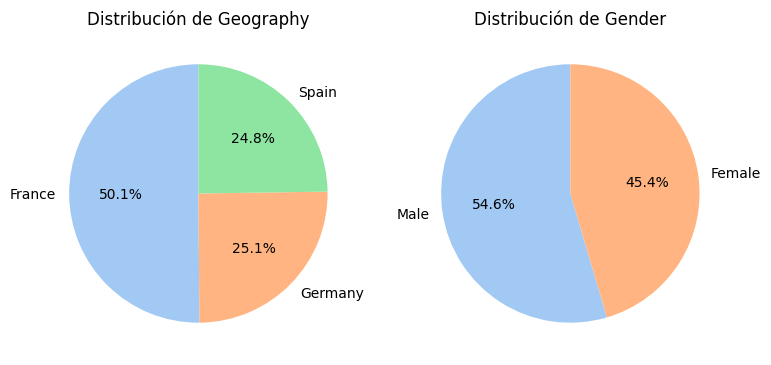

In [11]:
# Variables categóricas
cat_vars = ['Geography', 'Gender']

plt.figure(figsize=(15, 10))
for i, var in enumerate(cat_vars):
    plt.subplot(2, 4, i + 1)
    df[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f'Distribución de {var}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

Conclusiones variables Categoricas

- Geography El país donde reside el cliente (Francia, España o Alemania) - Vemos que casi todos nuestros clientes son de Francia y luego hay una paridad entre España y Alemania.
- Gender El género del cliente (masculino o femenino) - La mayor cantidad de nuestros clientes es masculino


# Análisis Exploratorio de Datos (EDA) - MULTIVARIADO

Comenzaremos a realizar un analisis mutivariado con foco en la variable Exited, la cual es la que nos dice si el cliente abandono el banco o no.

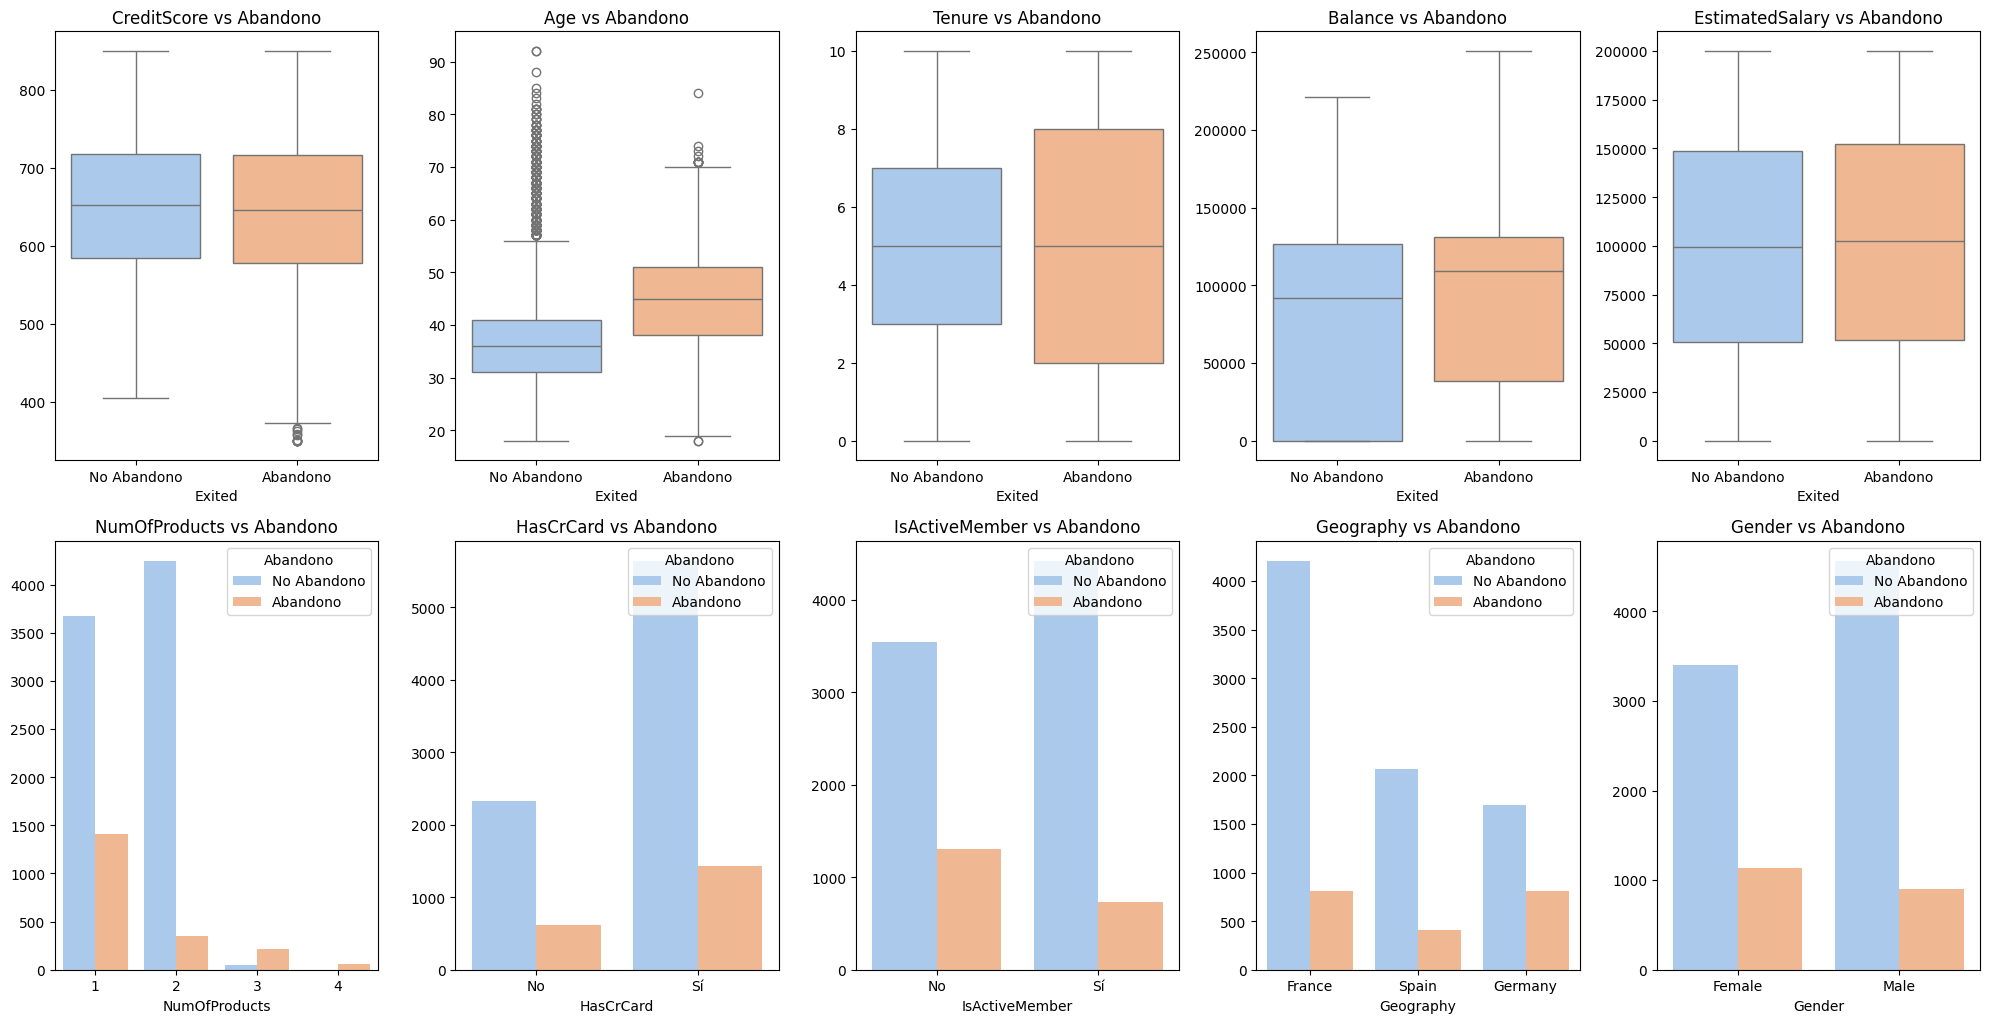

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
discrete_vars = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']
cat_vars = ['Geography', 'Gender']

plt.figure(figsize=(20, 15))

# Variables continuas vs Exited
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 5, i + 1)  # Cambiar a 3 filas y 5 columnas para acomodar más gráficos
    sns.boxplot(x='Exited', y=var, data=df, hue='Exited', palette='pastel')
    plt.title(f'{var} vs Abandono')
    plt.ylabel('')
    plt.xticks([0, 1], labels=['No Abandono', 'Abandono'])
    plt.legend([],[], frameon=False)

# Variables discretas vs Exited
for i, var in enumerate(discrete_vars):
    plt.subplot(3, 5, i + len(continuous_vars) + 1)  # Continuar desde donde terminó el anterior
    ax = sns.countplot(x=var, hue='Exited', data=df, palette='pastel')
    plt.title(f'{var} vs Abandono')
    plt.ylabel('')
    if var in ['HasCrCard', 'IsActiveMember']:
        plt.xticks([0, 1], labels=['No', 'Sí'])
    ax.legend(title='Abandono', loc='upper right', labels=['No Abandono', 'Abandono'])

# Variables categóricas vs Exited
for i, var in enumerate(cat_vars):
    plt.subplot(3, 5, i + len(continuous_vars) + len(discrete_vars) + 1)
    ax = sns.countplot(x=var, hue='Exited', data=df, palette='pastel')
    plt.title(f'{var} vs Abandono')
    plt.ylabel('')
    ax.legend(title='Abandono', loc='upper right', labels=['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()



#Conclusiones

Podemos determinar del analisis bivariado varias conclusiones.
- Las personas entre 40 y 50 son las que mas abandonan mientras que las que tienen entre 30 y 40 son las que siguen estando en el banco.
- Las personas con un solo producto tienden a abandonar el banco
- La relacion de tarjeta de credito sobre el abandono del banco no es concluyente
- Alemania es el pais que tiene mayor salida de clientes en relacion a cantidad de clietes que exites
- Las mujeres son las que mas abandonan el banco en relaciona a la cantidad que son.
- Otros atributos a nivel visual y primer analisis no podemos determinar el grado de influencia para determinar si salen o no del banco.

#ANALISIS MULTIVARIADO

El análisis multivariado explora la relación entre múltiples variables simultáneamente. Para esto, podemos utilizar gráficos como la matriz de correlación

In [13]:
#Definimos sobre aquyellos valores que nos permite realizar una correlacion de pearson
numeric_df = df.select_dtypes(include=['float64', 'int64'])
pearson_corr = numeric_df.corr()
pearson_corr


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004044,0.000703,0.006390,0.012203,-0.005282,0.025364,-0.001557,-0.026909
Age,-0.004044,1.000000,-0.010080,0.028303,-0.030650,-0.011706,0.085631,-0.007130,0.285323
Tenure,0.000703,-0.010080,1.000000,-0.012282,0.013418,0.022514,-0.028250,0.007830,-0.014117
Balance,0.006390,0.028303,-0.012282,1.000000,-0.304226,-0.014803,-0.010169,0.012704,0.118456
NumOfProducts,0.012203,-0.030650,0.013418,-0.304226,1.000000,0.003176,0.009621,0.014290,-0.047601
HasCrCard,-0.005282,-0.011706,0.022514,-0.014803,0.003176,1.000000,-0.011997,-0.010010,-0.007041
IsActiveMember,0.025364,0.085631,-0.028250,-0.010169,0.009621,-0.011997,1.000000,-0.011296,-0.156231
EstimatedSalary,-0.001557,-0.007130,0.007830,0.012704,0.014290,-0.010010,-0.011296,1.000000,0.012123
Exited,-0.026909,0.285323,-0.014117,0.118456,-0.047601,-0.007041,-0.156231,0.012123,1.000000


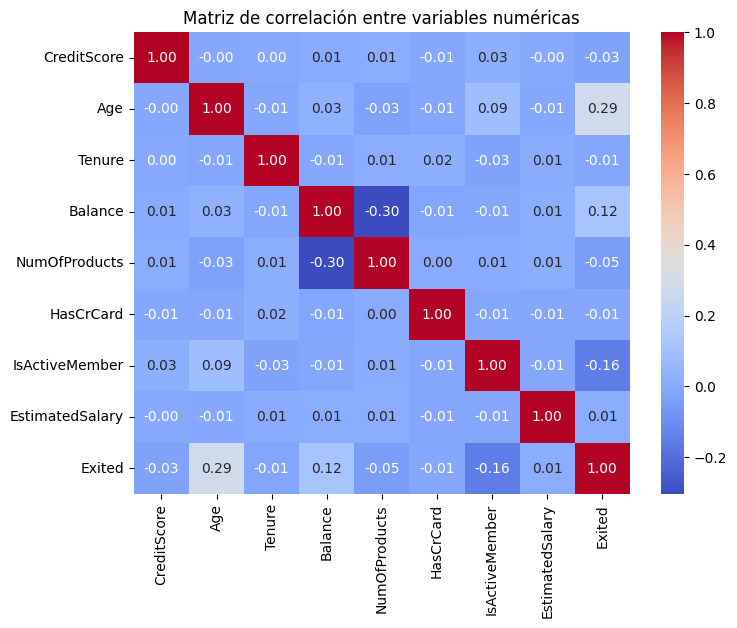

In [14]:
# Graficamos la matriz de correlación para variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()



No se ven correlaciones fuertes en el set de datos en los valores numericos.

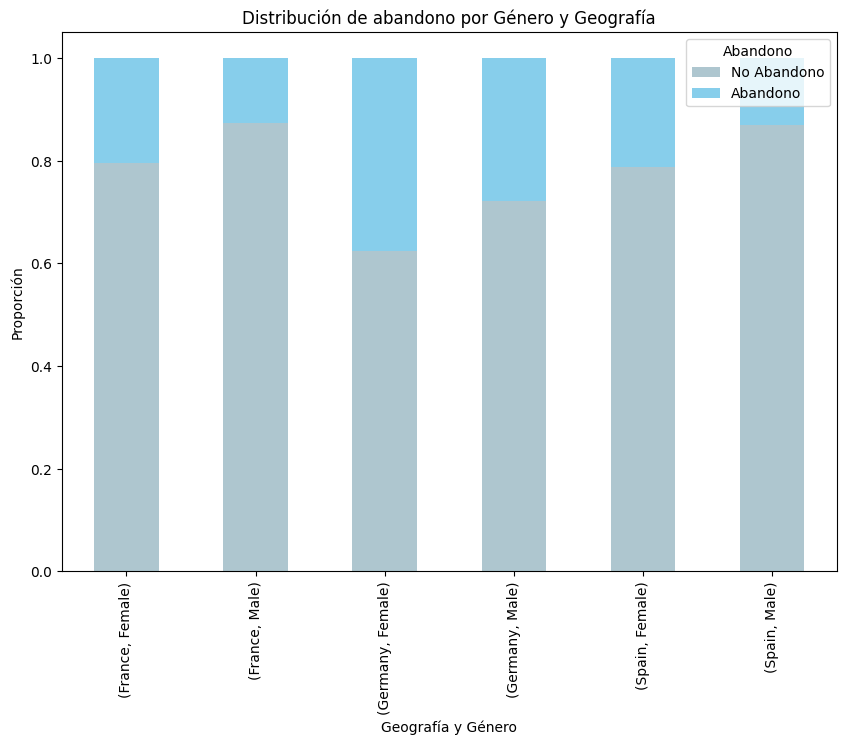

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear una tabla cruzada para las variables
crosstab_data = pd.crosstab([df['Geography'], df['Gender']], df['Exited'], normalize='index')

# Crear el gráfico de barras apiladas
crosstab_data.plot(kind='bar', stacked=True, color=['#AEC6CF', '#87CEEB'], figsize=(10, 7))

plt.title('Distribución de abandono por Género y Geografía')
plt.xlabel('Geografía y Género')
plt.ylabel('Proporción')
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'], loc='upper right')
plt.show()



# Conclusiones generales
1. ¿Qué factores influyen más en la decisión de un cliente de abandonar el banco?
2. ¿Existen diferencias significativas en la tasa de abandono entre diferentes países o géneros?
3. ¿La puntuación crediticia, la edad o la duración de la relación con el banco son predictores importantes del abandono?
4. ¿El hecho de tener una tarjeta de crédito o ser un miembro activo reduce la probabilidad de abandono?


1. ¿Qué factores influyen más en la decisión de un cliente de abandonar el banco?
- Luego de un analisis Eda podemos determinar algunos factores pero ninguno determinantes, para ello es recomendable seguir avanzando con el proyecto de machine learning.

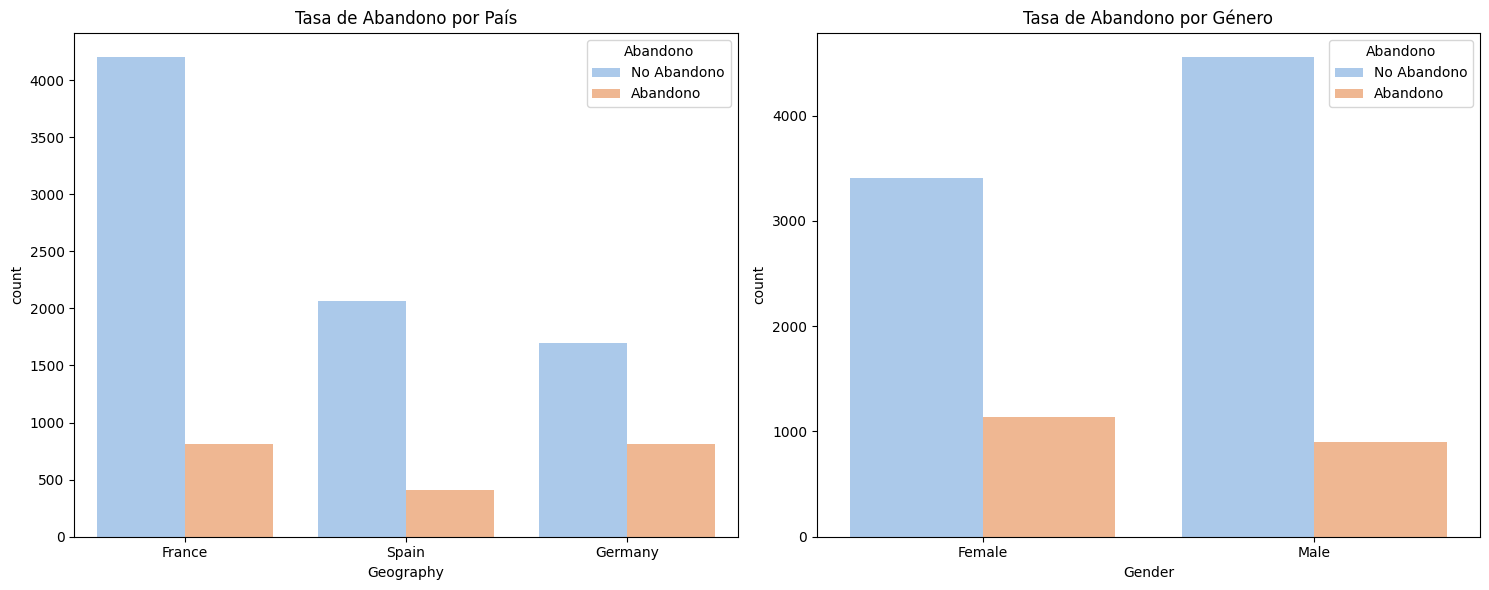

In [16]:
#2. ¿Existen diferencias significativas en la tasa de abandono entre diferentes países o géneros?
plt.figure(figsize=(15, 6))

# País
plt.subplot(1, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=df, palette='pastel')
plt.title('Tasa de Abandono por País')
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])

# Género
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=df, palette='pastel')
plt.title('Tasa de Abandono por Género')
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()


Conclusión:
Los clientes en Alemania muestran una mayor propensión a abandonar el banco, lo que podría estar relacionado con factores económicos o culturales específicos de la región. Además, las mujeres parecen abandonar el banco en mayor proporción que los hombres, lo que sugiere que podrían percibir menos valor en los servicios ofrecidos o enfrentar barreras específicas.

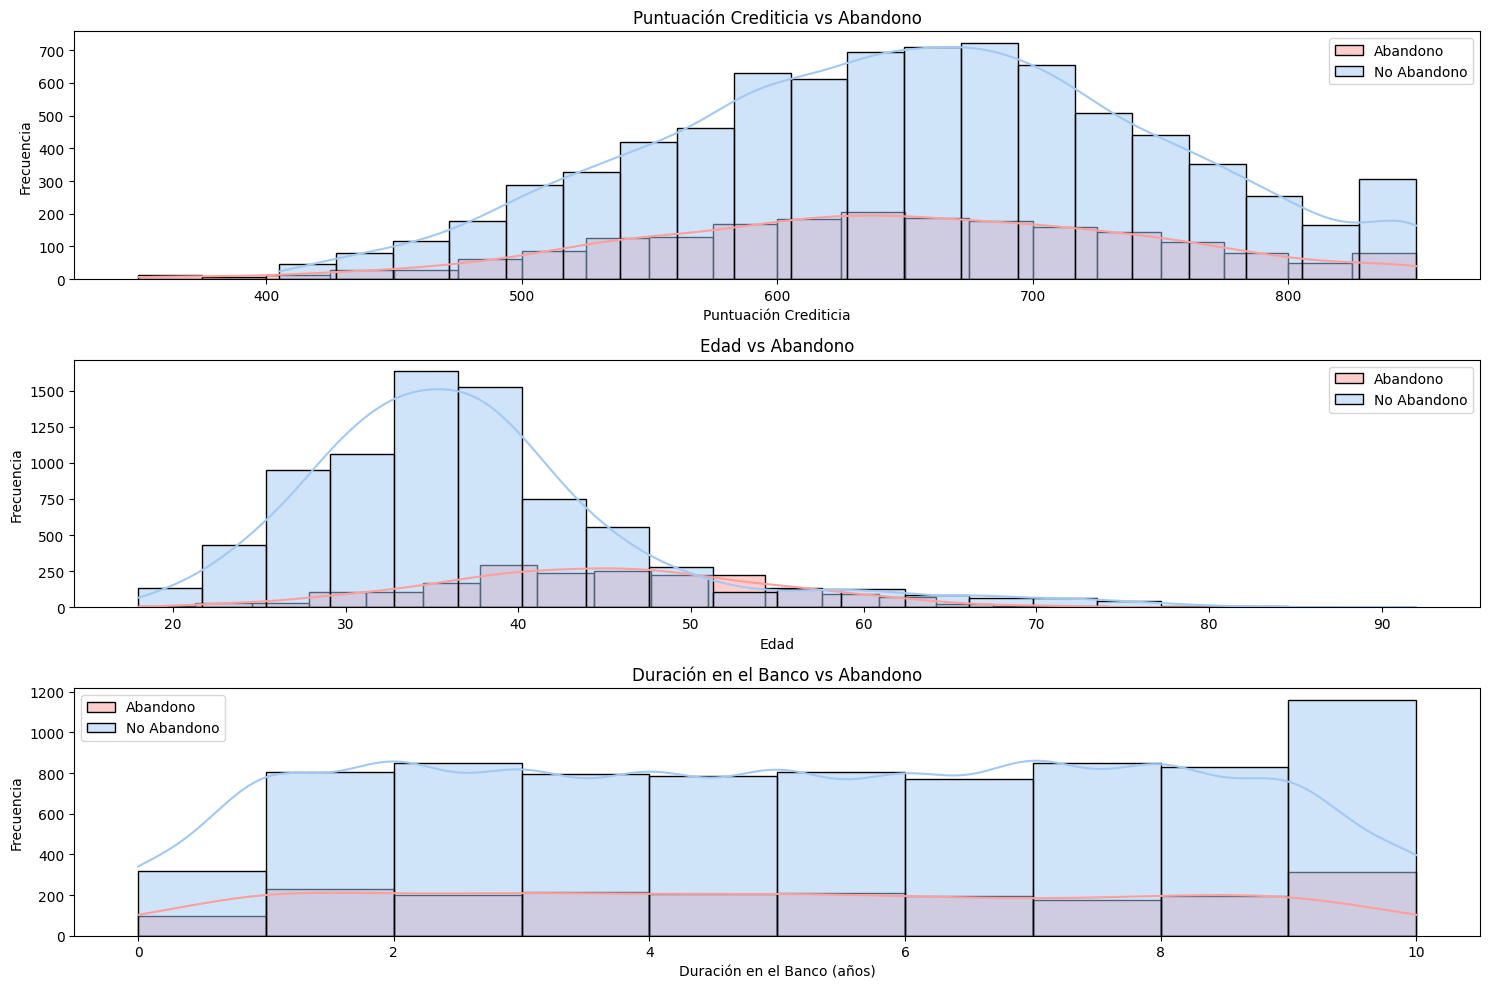

In [22]:
#3. ¿La puntuación crediticia, la edad o la duración de la relación con el banco son predictores importantes del abandono?

colors = sns.color_palette("pastel")

plt.figure(figsize=(15, 10))

# Puntuación crediticia
plt.subplot(3, 1, 1)
sns.histplot(df[df['Exited'] == 1]['CreditScore'], kde=True, color=colors[3], label='Abandono', bins=20)
sns.histplot(df[df['Exited'] == 0]['CreditScore'], kde=True, color=colors[0], label='No Abandono', bins=20)
plt.title('Puntuación Crediticia vs Abandono')
plt.xlabel('Puntuación Crediticia')
plt.ylabel('Frecuencia')
plt.legend()

# Edad
plt.subplot(3, 1, 2)
sns.histplot(df[df['Exited'] == 1]['Age'], kde=True, color=colors[3], label='Abandono', bins=20)
sns.histplot(df[df['Exited'] == 0]['Age'], kde=True, color=colors[0], label='No Abandono', bins=20)
plt.title('Edad vs Abandono')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Duración de la relación con el banco
plt.subplot(3, 1, 3)
sns.histplot(df[df['Exited'] == 1]['Tenure'], kde=True, color=colors[3], label='Abandono', bins=10)
sns.histplot(df[df['Exited'] == 0]['Tenure'], kde=True, color=colors[0], label='No Abandono', bins=10)
plt.title('Duración en el Banco vs Abandono')
plt.xlabel('Duración en el Banco (años)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()





Conclusión:
La edad es un predictor clave del abandono, especialmente entre los clientes mayores de 50 años, quienes pueden estar más inclinados a cambiar de banco debido a cambios en sus necesidades financieras o percepciones de servicio.

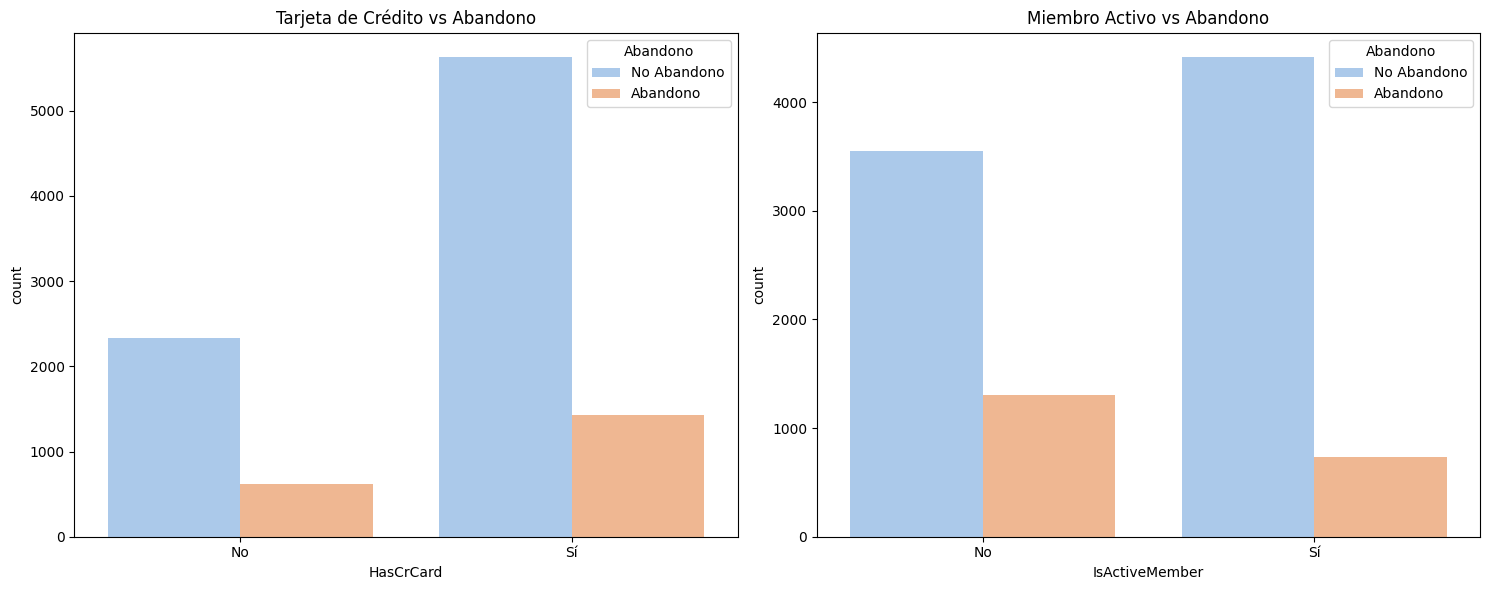

In [18]:
#4. ¿El hecho de tener una tarjeta de crédito o ser un miembro activo reduce la probabilidad de abandono?

plt.figure(figsize=(15, 6))

# Tarjeta de crédito
plt.subplot(1, 2, 1)
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='pastel')
plt.title('Tarjeta de Crédito vs Abandono')
plt.xticks([0, 1], labels=['No', 'Sí'])
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])

# Miembro activo
plt.subplot(1, 2, 2)
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='pastel')
plt.title('Miembro Activo vs Abandono')
plt.xticks([0, 1], labels=['No', 'Sí'])
plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()


Conclusión:
La posesión de una tarjeta de crédito no muestra una correlación significativa con el abandono, lo que sugiere que otros factores, como el uso activo de los productos y servicios del banco, son más críticos. Los clientes inactivos, aquellos que no realizan transacciones frecuentes o mantienen bajos saldos, son significativamente más propensos a abandonar.

# Conclusiones generales

* Los análisis indican que la edad, el género y la geografía son los factores más influyentes en la decisión de un cliente de abandonar el banco. En particular, la interacción entre estos factores podría revelar segmentos de clientes con un riesgo más alto de abandono, como mujeres mayores en Alemania.